In [18]:
import datetime
from itertools import combinations
from typing import NamedTuple
from matplotlib import pyplot as plot, rcParams as plot_params
from git import Repo
import networkx as nx
from pprint import pprint


In [19]:
repo = Repo("../quizzology")

In [20]:
repo_graph = nx.Graph()
for commit in repo.iter_commits():
    for (left,right) in combinations(commit.stats.files,2):
        if (left,right) in repo_graph.edges:
            data = repo_graph.get_edge_data(left,right)
            data['count'] = data.get('count',1) + 1
        else:
            repo_graph.add_edge(left,right)


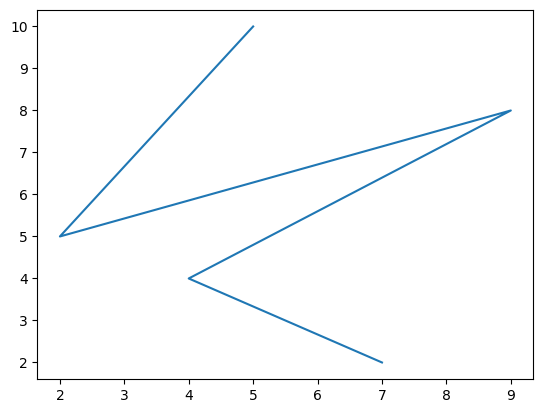

In [21]:
# Create a plot 

x = [5, 2, 9, 4, 7]
y = [10, 5, 8, 4, 2]
plot.plot(x, y)
plot.show()

In [22]:
# Draw a network plot of some kind

# graph = nx.petersen_graph() # well known sample data 
# subax = plot.subplot(121)
# nx.draw(graph)

# repo_plot = plot.subplot(122)
# nx.draw(repo_graph, with_labels=True)



In [23]:
left, right = next(iter(repo_graph.edges))
print( (left,right) in repo_graph.edges )

pprint(list(nx.connected_components(repo_graph)))


True
[{'.dockerignore',
  '.github/workflows/quizzology-ci.yml',
  '.gitignore',
  '.pylintrc',
  'Dockerfile',
  'README.md',
  'TestDockerfile',
  'apps/__init__.py',
  'apps/author.py',
  'apps/author/__init__.py',
  'apps/author/author.py',
  'apps/author/author_controller.py',
  'apps/author/tests/__init__.py',
  'apps/author/tests/test_authorcontroller.py',
  'apps/author/tests/test_controller.py',
  'apps/author/tests/test_quiz_authoring_form.py',
  'apps/author/tests/test_quiz_schema.py',
  'apps/author/views/quiz_author_home.tpl',
  'apps/author/views/quiz_authoring_form.tpl',
  'apps/authoring/__init__.py',
  'apps/authoring/author.py',
  'apps/authoring/views/quiz_authoring_form.tpl',
  'apps/study.py',
  'apps/study/__init__.py',
  'apps/study/session_store.py',
  'apps/study/session_store_mongodb.py',
  'apps/study/session_store_tinydb.py',
  'apps/study/study.py',
  'apps/study/studycontroller.py',
  'apps/study/tests/__init__.py',
  'apps/study/tests/test_quiz_question.p

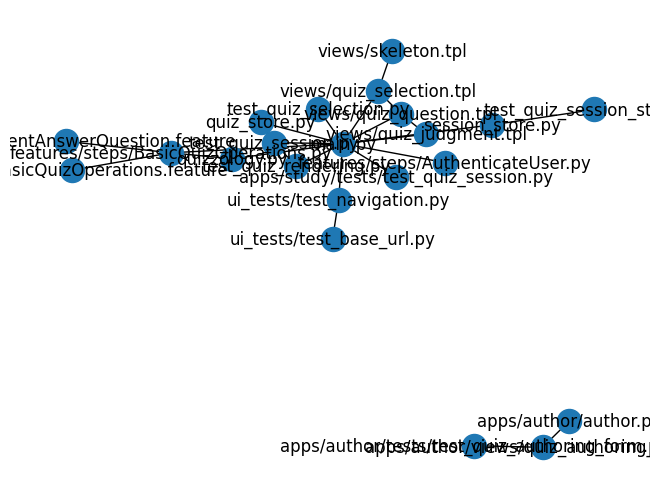

In [24]:
# Perhaps we should trim the data set so that we don't plot every single 
# edge and node in one ugly graph.
busiest_graph = nx.Graph()
for (l,r) in repo_graph.edges:
    data = repo_graph.get_edge_data(l,r)
    ordinal = data.get('count',0)
    if ordinal > 8:
        busiest_graph.add_edge(l,r)
nx.draw(busiest_graph, with_labels=True)


    
    

In [25]:
help(nx.draw)


Help on function draw in module networkx.drawing.nx_pylab:

draw(G, pos=None, ax=None, **kwds)
    Draw the graph G with Matplotlib.
    
    Draw the graph as a simple representation with no node
    labels or edge labels and using the full Matplotlib figure area
    and no axis labels by default.  See draw_networkx() for more
    full-featured drawing that allows title, axis labels etc.
    
    Parameters
    ----------
    G : graph
        A networkx graph
    
    pos : dictionary, optional
        A dictionary with nodes as keys and positions as values.
        If not specified a spring layout positioning will be computed.
        See :py:mod:`networkx.drawing.layout` for functions that
        compute node positions.
    
    ax : Matplotlib Axes object, optional
        Draw the graph in specified Matplotlib axes.
    
    kwds : optional keywords
        See networkx.draw_networkx() for a description of optional keywords.
    
    Examples
    --------
    >>> G = nx.dodecahe

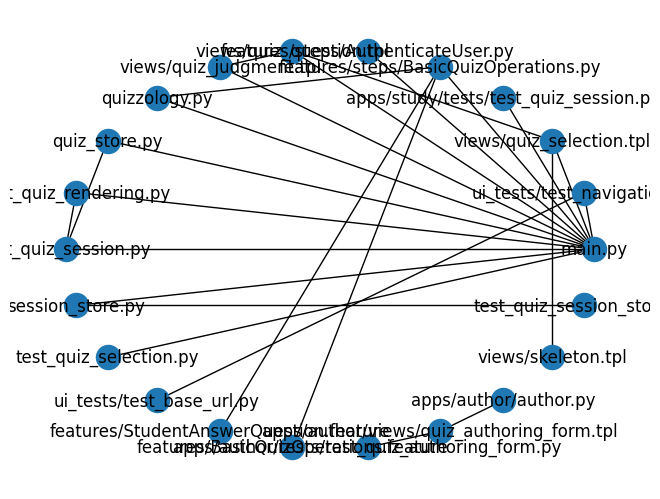

In [31]:
plot_params.update({'font.size': 8})
nx.draw_circular(busiest_graph, with_labels=True)


In [ ]:
nx.draw_spectral(busiest_graph, with_labels=True)


In [ ]:
nx.draw_random(busiest_graph, with_labels=True)
